
<img src="https://user-images.githubusercontent.com/7065401/55025843-7d99a280-4fe0-11e9-938a-4879d95c4130.png"
    style="width:150px; float: right; margin: 0 40px 40px 40px;"></img>

<!-- <img src="https://scontent.ftun15-1.fna.fbcdn.net/v/t39.30808-6/311004579_479229304250165_9026324343313302553_n.png?_nc_cat=109&ccb=1-7&_nc_sid=5f2048&_nc_ohc=RW7tL5PHPcIAX9bZ7lp&_nc_ht=scontent.ftun15-1.fna&oh=00_AfB8mMPGwpjTQwlySZkZJ_9dlXOjjsjJ5E39VDPOwIEeuQ&oe=654F55AB" width="100" height="100" style="float: left; margin-right: 10px;" > -->
    
#   <div style="text-align: center;"> Méthodes de Monte Carlo (2023-2024)  </div>
#   <div style="text-align: center;">TP1: Méthode de la fonction inverse
  </div>     

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


# Objectif

Il s’agit de mettre en oeuvre les méthodes de la fonction inverse et de transformation
afin de simuler un grand nombre ($x_1, . . . ,x_n$) de réalisations d’une variable aléatoire $X$ à partir
d’un générateur de la loi uniforme sur $[0,1]$ (notée $U([0,1])$).


# Principe

Le principe de la méthode de transformée inverse est une technique couramment utilisée en probabilité et statistiques pour générer des nombres aléatoires à partir d'une distribution de probabilité donnée. Elle repose sur le fait que si on a une variable aléatoire X avec une fonction de répartition F(X), alors la variable aléatoire U=F(X) suit une loi uniforme sur [0,1]. Le but est de générer des échantillons aléatoires de la variable aléatoire X à partir de U.

Les étapes à suivre pour appliquer la méthode de la transformée inverse sont:
- Obtenir la fonction de répartition à partir de $f_X(x)$.
- Trouver l'inverse de la fonction de répartition $F^{-1}_X(u)$.
- Générer les valeurs aléatoires:
    -  Générer $u$ de la loi Uniforme $(0,1).$
    - Calculer $x=F^{-1}_X(u)$
    
    
![image.png](attachment:image.png)



# Exercice 1:

####  1. Écrire une fonction pour générer $n$ nombres aléatoires à partir de la distribution qui a pour densité : $f_X(x)=3x^2$, $0<x<1$.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Fonction pour générer des nombres aléatoires selon la distribution spécifiée
def generate_it(n):
    np.random.seed(2023)
    u = np.random.uniform(0, 1, n)
    #autrement: u = np.random.uniform(low=1, high=10)

    xgen = np.cbrt(u)  # Cube root in Python is cbrt
   # xgen = u^(1/3)  # autrement
    return xgen

In [ ]:
# Générer 10 nombres aléatoires
A = generate_it(10)
print(A)

[0.6854041  0.96205234 0.83779669 0.50211913 0.52090231 0.77633587
 0.28058408 0.89928944 0.8064004  0.81679856]


In [ ]:
mydata = pd.DataFrame({'A': A})
print(mydata)

          A
0  0.685404
1  0.962052
2  0.837797
3  0.502119
4  0.520902
5  0.776336
6  0.280584
7  0.899289
8  0.806400
9  0.816799


In [ ]:
# Créer un DataFrame et l'écrire dans un fichier Excel
mydata = pd.DataFrame({'A': A})


# Écrire le DataFrame dans un fichier Excel
# Note: L'installation d'un package en Python est généralement effectuée en dehors du script avec pip ou conda
mydata.to_excel("tp1_simulation.xlsx")

# Vérifier le contenu de mydata
mydata.head()

,A
0,0.685404
1,0.962052
2,0.837797
3,0.502119
4,0.520902


#### 2. Visualiser la distribution théorique



In [ ]:
# Fonction pour générer la distribution théorique
def generate_theoretical_distribution():
    x = np.arange(0, 1.01, 0.01)  # similaire à seq(0, 1, by=0.01) en R
    fx = 3 * x**2
    return pd.DataFrame({'x': x, 'fx': fx})
# ==> Generate regular sequences.

In [ ]:
# Générer la distribution théorique
theoretical_df = generate_theoretical_distribution()
print(theoretical_df)


        x      fx
0    0.00  0.0000
1    0.01  0.0003
2    0.02  0.0012
3    0.03  0.0027
4    0.04  0.0048
..    ...     ...
96   0.96  2.7648
97   0.97  2.8227
98   0.98  2.8812
99   0.99  2.9403
100  1.00  3.0000

[101 rows x 2 columns]


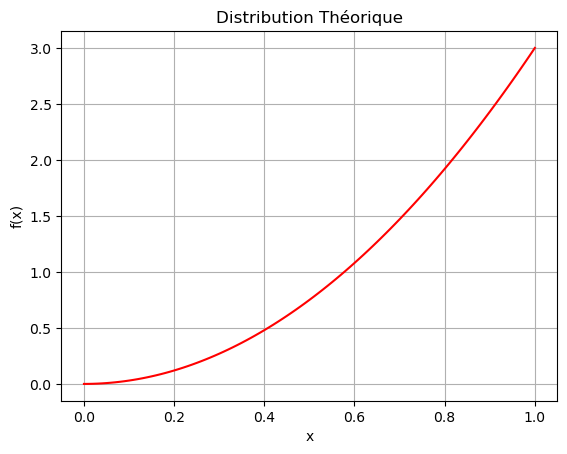

In [ ]:
# Visualisation de la distribution théorique avec Matplotlib
import matplotlib.pyplot as plt

plt.plot(theoretical_df['x'], theoretical_df['fx'], color='red')
plt.title('Distribution Théorique')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

#### 3. Visualiser la distribution empirique (compte)


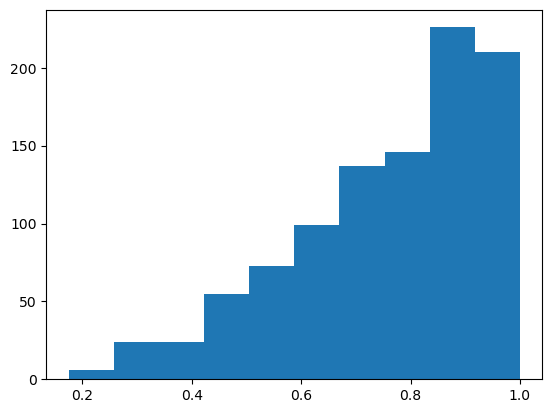

In [ ]:
def plot_empirical_distribution(n, bin_width):
    data_emp = generate_it(n)
    empirical_df = pd.DataFrame({'data_emp': data_emp})

    # Histogramme pour la distribution empirique
    plt.hist(empirical_df['data_emp'])
#              bins=np.arange(0, 1 + bin_width, bin_width),
#              color='red', edgecolor='black', alpha=0.7,
#              density=False)
    # alpha= 1 (opaque ), alpha=0 (transparent)
#     plt.title('Distribution Empirique')
#     plt.xlabel('Données Empiriques')
#     plt.ylabel('Count')
#     plt.grid(True)
#     plt.show()
# Plot empirical distribution with 1000 samples and bin width of 0.05
plot_empirical_distribution(n=1000, bin_width=0.05)

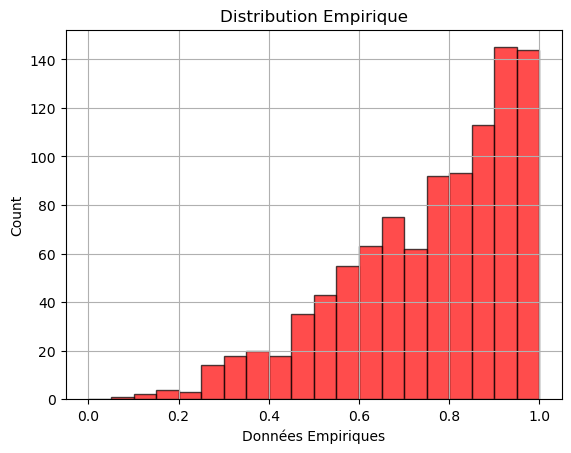

In [ ]:
# Fonction pour générer la distribution empirique avec 1000 points de données
def plot_empirical_distribution(n, bin_width):
    data_emp = generate_it(n)
    empirical_df = pd.DataFrame({'data_emp': data_emp})

    # Histogramme pour la distribution empirique
    plt.hist(empirical_df['data_emp'],
             bins=np.arange(0, 1 + bin_width, bin_width),
             color='red', edgecolor='black', alpha=0.7,
             density=False)
    # alpha= 1 (opaque ), alpha=0 (transparent)
    plt.title('Distribution Empirique')
    plt.xlabel('Données Empiriques')
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()
# Plot empirical distribution with 1000 samples and bin width of 0.05
plot_empirical_distribution(n=1000, bin_width=0.05)

#### 4.  Visualiser la distribution empirique (densité).


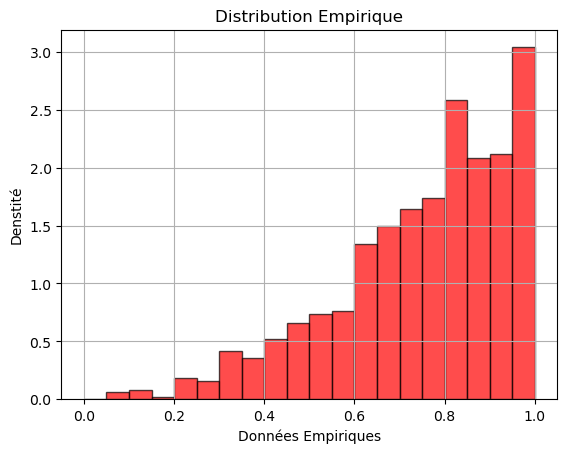

In [ ]:
# Fonction pour générer la distribution empirique avec 1000 points de données
def plot_empirical_distribution(n, bin_width):
    data_emp = generate_it(n)
    empirical_df = pd.DataFrame({'data_emp': data_emp})

    # Histogramme pour la distribution empirique
    plt.hist(empirical_df['data_emp'], bins=np.arange(0, 1 + bin_width, bin_width), color='red',
             edgecolor='black', alpha=0.7, density=True)
    # density=True: aire sous l'histogamme =1: ( Normalisation de l'histogramme.)
    plt.title('Distribution Empirique')
    plt.xlabel('Données Empiriques')
    plt.ylabel('Denstité')
    plt.grid(True)
    plt.show()

# Plot empirical distribution with 1000 samples and bin width of 0.05
plot_empirical_distribution(n=1000, bin_width=0.05)


#### 5.  Visualiser dans la même figure les distributions empiriques et théoriques. Conclure.

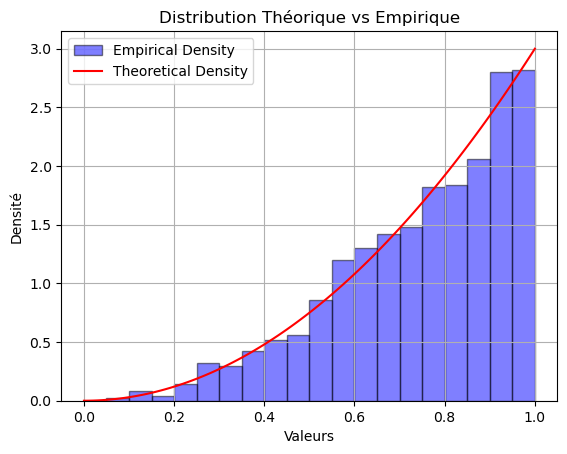

In [ ]:
def plot_combined_distributions(n=1000, bin_width=0.05):
    data_emp = generate_it(n)
    empirical_df = pd.DataFrame({'data_emp': data_emp})

    # Préparer le graphique de la distribution empirique
    plt.hist(empirical_df['data_emp'], bins=np.arange(0, 1 + bin_width, bin_width), color='blue', edgecolor='black', alpha=0.5, density=True, label='Empirical Density')

    # Ajouter la distribution théorique
    plt.plot(theoretical_df['x'], theoretical_df['fx'], color='red', label='Theoretical Density')

    # Ajouter des titres et des légendes
    plt.title('Distribution Théorique vs Empirique')
    plt.xlabel('Valeurs')
    plt.ylabel('Densité')
    plt.legend()
    plt.grid(True)

    # Afficher le graphique
    plt.show()

# Afficher les distributions combinées
plot_combined_distributions()

# ==> Superposition des distributions théorique et empirique



# Exercice 2:

1. Simuler un échantillon de taille $1000$ de variables aléatoires indépendantes et identiquement distribuées suivant la loi exponentielle de paramètre $\lambda = 2$ en utilisant la méthode d'inversion.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from sympy import symbols, solve, log, exp, lambdify


x, u, lambda_ = symbols('x u lambda')


F_x = 1 - exp(-lambda_ * x)
inverse_f = solve(F_x - u , x)
print(inverse_f)

[log(-1/(u - 1))/lambda]


In [ ]:
numerical_inverse_f = lambdify((u, lambda_),inverse_f) # lambdify est un pont entre numpy et sympy
# le premier élément de la solution (dans ce cas le seul élément)


<function _lambdifygenerated at 0x0000023763EE0540>


In [ ]:
np.random.seed(123)
n = 1000
U = np.random.uniform(0, 1, n)
lambda_ = 2

numerical_inverse_f(U, lambda_)


[array([5.96136072e-01, 1.68533741e-01, 1.28642040e-01, 4.00716841e-01,
        6.35535468e-01, 2.75048768e-01, 1.97549103e+00, 5.77321137e-01,
        3.27860097e-01, 2.48886851e-01, 2.10171125e-01, 6.52909949e-01,
        2.88636088e-01, 3.07663996e-02, 2.53785675e-01, 6.69696620e-01,
        1.00747130e-01, 9.64598129e-02, 3.79164420e-01, 3.79459324e-01,
        5.03109031e-01, 9.46669551e-01, 6.44502752e-01, 4.72118188e-01,
        6.40865170e-01, 1.95011660e-01, 2.24542895e-01, 1.29555880e-01,
        1.73867545e-01, 4.98446966e-01, 4.83132398e-02, 2.84316688e-01,
        2.81816842e-01, 3.40298233e-01, 2.77415132e-01, 1.87173099e-01,
        2.77869052e-01, 1.11928506e+00, 1.44263257e+00, 3.48413648e-01,
        4.89020508e-01, 6.14333149e-02, 1.90839244e-01, 2.67923201e-01,
        1.00611265e+00, 1.44144705e-01, 3.29889341e-01, 2.11886915e+00,
        3.66448541e-01, 4.74529040e-01, 6.42740100e-02, 8.75330262e-01,
        4.61985233e-01, 3.93803668e-01, 2.09855932e-01, 1.812895

In [ ]:
# autrement
X = (-1/lambda_) * np.log(1 - U)

print(X)

[5.96136072e-01 1.68533741e-01 1.28642040e-01 4.00716841e-01
 6.35535468e-01 2.75048768e-01 1.97549103e+00 5.77321137e-01
 3.27860097e-01 2.48886851e-01 2.10171125e-01 6.52909949e-01
 2.88636088e-01 3.07663996e-02 2.53785675e-01 6.69696620e-01
 1.00747130e-01 9.64598129e-02 3.79164420e-01 3.79459324e-01
 5.03109031e-01 9.46669551e-01 6.44502752e-01 4.72118188e-01
 6.40865170e-01 1.95011660e-01 2.24542895e-01 1.29555880e-01
 1.73867545e-01 4.98446966e-01 4.83132398e-02 2.84316688e-01
 2.81816842e-01 3.40298233e-01 2.77415132e-01 1.87173099e-01
 2.77869052e-01 1.11928506e+00 1.44263257e+00 3.48413648e-01
 4.89020508e-01 6.14333149e-02 1.90839244e-01 2.67923201e-01
 1.00611265e+00 1.44144705e-01 3.29889341e-01 2.11886915e+00
 3.66448541e-01 4.74529040e-01 6.42740100e-02 8.75330262e-01
 4.61985233e-01 3.93803668e-01 2.09855932e-01 1.81289591e-01
 2.69803096e-01 5.71753730e-01 1.04155149e+00 3.57106086e-01
 5.53292669e-01 4.40868031e-01 4.90285979e-01 5.61486894e-01
 9.23664962e-01 4.343023


2. Vérifier que la moyenne empirique de l'échantillon simulé est proche de la moyenne théorique de la loi exponentielle.


In [ ]:
# Moyenne théorique de la loi Exponentielle est: 1/lambda = 1/2 = 0.5
mean_X = np.mean(X)
print(mean_X)


0.49915298820686654


3. Tracer l'histogramme de l'échantillon simulé pour visualiser sa distribution.


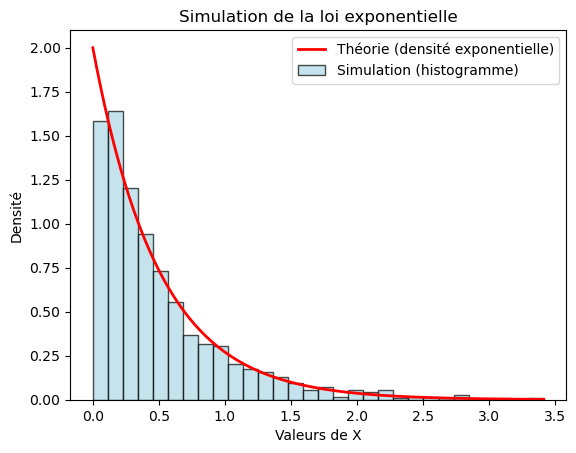

In [ ]:
plt.hist(X, density=True, bins=30, color="lightblue", edgecolor="black", alpha=0.7)
plt.title("Simulation de la loi exponentielle")
plt.xlabel("Valeurs de X")
plt.ylabel("Densité")

# Superposer la courbe de distribution exponentielle théorique
x_values = np.linspace(0, max(X), 1000)
plt.plot(x_values, lambda_ * np.exp(-lambda_ * x_values), color="red", linewidth=2)


plt.legend(["Théorie (densité exponentielle)", "Simulation (histogramme)"])
plt.show()






# Exercice 3:

Supposons que le nombre de clients dans une file d'attente suit une distribution de Poisson avec un taux moyen de $3$ clients par minute. Simuler $100$ observations de cette distribution de probabilité.


In [ ]:
help(np.random.poisson)

Help on built-in function poisson:

poisson(...) method of numpy.random.mtrand.RandomState instance
    poisson(lam=1.0, size=None)
    
    Draw samples from a Poisson distribution.
    
    The Poisson distribution is the limit of the binomial distribution
    for large N.
    
    .. note::
        New code should use the `~numpy.random.Generator.poisson`
        method of a `~numpy.random.Generator` instance instead;
        please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    lam : float or array_like of floats
        Expected number of events occurring in a fixed-time interval,
        must be >= 0. A sequence must be broadcastable over the requested
        size.
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  If size is ``None`` (default),
        a single value is returned if ``lam`` is a scalar. Otherwise,
        ``np.array(lam).size`` samp

In [ ]:
np.random.seed(123)
n = 100
lambda_ = 3  # taux moyen 3 clients par minute
X = np.random.poisson(lambda_, n)  # Générer les observations
print(X)
np.unique(X, return_counts=True)# juste pour vérifier l'histogramme

[2 6 3 3 6 2 2 3 5 1 3 3 4 6 2 2 2 2 3 4 3 4 3 2 2 1 5 3 3 4 5 5 2 2 5 4 2
 6 1 6 4 2 2 3 4 2 1 2 1 4 2 5 2 3 3 2 1 3 4 3 5 3 3 2 3 1 3 0 2 3 1 2 9 4
 0 1 1 4 3 6 3 3 6 3 5 6 1 1 2 3 3 4 4 4 4 1 1 3 2 4]


(array([0, 1, 2, 3, 4, 5, 6, 9]),
 array([ 2, 14, 24, 27, 16,  8,  8,  1], dtype=int64))

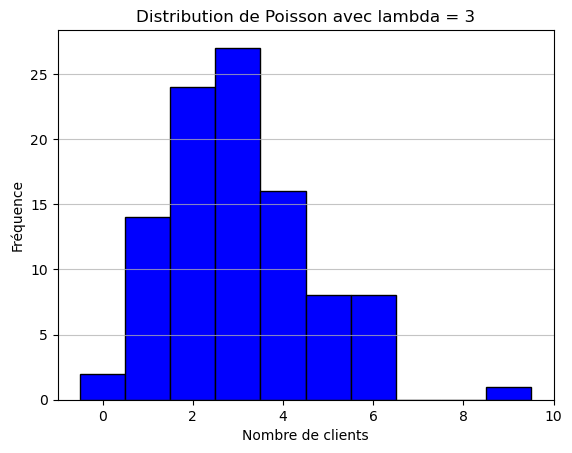

In [ ]:

# Traçons l'histogramme des observations de la distribution de poisson
plt.hist(X, bins=np.arange(-0.5, max(X) + 1.5, 1), color="blue", edgecolor="black")
plt.xlabel("Nombre de clients")
plt.ylabel("Fréquence")
plt.title("Distribution de Poisson avec lambda = 3")
plt.grid(axis='y', alpha=0.75)
plt.show()
